## Tricky Integrals

Unless you are a Physicist, the sight of the following integral will most likely send a shiver down your spine.

$$\int_0^\infty 6x^2e^{-3x}dx$$

This is not a fun integral to evaluate. The standard approach involves integrating by parts twice. If you remember to divide by the 3 when required, keep an eye on that tricky negative exponent, and correcting substitute your limits both times, you might end up with the correct answer of $4/9$ (quite possibly with a headache to accompany it). This method is cumbersome and mistake-prone. But thankfully this isn't the only way.

I set aside Physicists in the introduction as they tend to be rather proficient with their integrals and have probably just memorised the fact that

$$\int_0^\infty x^ne^{-x}dx = n! \qquad n\in\mathbb{N}$$

This is a really useful identity to know. A quick substitution in the original problem and you have exactly that, up to a constant that is. If this method works for you then go ahead. It is undeniably fast and you are far less likely to make a mistake than with the original method. 

Yet this still doesn't sit well with me. I've never been a fan of learning formulae. You can forget them or confuse them with others. And even if you remember it perfectly, the substitution can still give you trouble. Lastly, even if you get all of these steps right, how can you justify to yourself that you did in fact remember the correct method. The result's appearance is similar to the appearance of that of a rabbit from a hat - magic. I offer one more approach.

## The Exponential Distribution

Before we get to the brunt of the problem, we need to take a slight detour to introduce the exponential distribution to those unacquainted with it. This is is a very prominent distribution in statistics and so I shall only give a quick run-through of its uses and properties as I hope most readers will be familiar with them already. For a more detailed look at it, the corresponding [Wikipedia page](https://en.wikipedia.org/wiki/Exponential_distribution) does an excellent job.

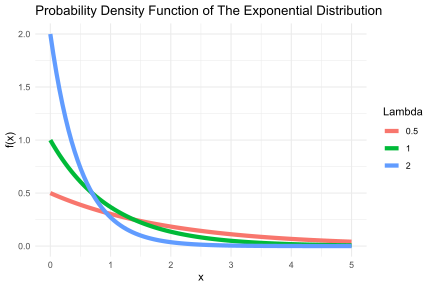

In [3]:
options(repr.plot.width=6, 
        repr.plot.height=4,
        jupyter.plot_mimetypes = "image/svg+xml")

library(ggplot2)
vals <- seq(0,5,length.out = 100)
params <- c(0.5, 1, 2)
densities <- data.frame(lambda = rep(params, each = 100),
                        x = rep(vals, times = 3),
                        f_x = unlist(lapply(params, dexp, x = vals)))
ggplot(densities, aes(x = x, y = f_x, col = factor(lambda))) +
  geom_line(size = 2) +
  labs(x = "x", y = "f(x)", col = "Lambda", title = "Probability Density Function of The Exponential Distribution") + 
  theme_minimal()

The exponential distribution is a probability distribution that describes the time between the occurrence of events in a Poisson process, a process in which events occur at a constant rate, independent of when the last event occurred. It has a single parameter, $\lambda > 0$, which controls the rate of the Poisson process, a small $\lambda$ meaning that events occur more frequently. This can be used to model processes such as the time between customers arriving at a checkout, the time until a radioactive particle decays, or distance between mutations on a DNA strand. The key property of this distribution is that it is 'memoryless'. In fact, it is the *only* continuous distribution with this property. This means that if you continue to wait for an event to occur, the probability of the event occurring in any instant neither increases or decreases with time.

These characteristics are very interesting but the properties we are interested in for solving integrals are the probability density function (PDF) and the moments of an exponential random variable. We start with the PDF of an exponentially distributed random variable $X$. It is given by

$$f_X(x) =
\begin{cases} 
      \lambda e^{-\lambda x} & x\geq 0 \\
      0 & x < 0 
   \end{cases}
$$
  
This gives us an insight into a simple case of the problem. Since, the support of an exponential random variable is $(0,\infty)$ we must have that the integral of its density over that region is 1 and so

$$\int_0^{\infty}\lambda e^{-\lambda x}dx = 1 \qquad \lambda \in \mathbb{R} \tag{1}$$

We can use this for computing integrals of this form with the most minimal work. For example

$$\int_0^{\infty}8 e^{-2 x}dx \stackrel{(1)}{=} 4\int_0^{\infty} 2e^{-2 x}dx = 4$$

## Adding an $x$ or Two

"So what?", you may ask, "how does this help us with our original problem?". And at the moment we still can't solve the more complex case The factor of $x^2$ makes this a bit trickier but with the introduction of two more properties of the exponential distribution this becomes trivial. In particular, we need the mean and variance of the exponential random variable $X$. These are 

$$
\mathbb{E}(X) = \frac{1}{\lambda} \\ 
\textrm{Var}(X) = \frac{1}{\lambda^2}
$$

and using the formula relating variance and the first two moments of a random variable we get 

$$\mathbb{E}(X^2) = \textrm{Var}(X) + \mathbb{E} (X)^2= \frac{1}{\lambda^2} + \frac{1}{\lambda^2} = \frac{2}{\lambda^2}$$

These expected values are defined in terms of the integrals

$$\mathbb{E}(X) = \int_0^{\infty}\lambda x e^{-\lambda x}dx$$

and

$$\mathbb{E}(X^2) = \int_0^{\infty}\lambda x^2 e^{-\lambda x} dx$$

and so we get 

$$\int_0^{\infty}\lambda xe^{-\lambda x} dx= \frac{1}{\lambda} \qquad \lambda \in \mathbb{R}\tag{2}$$
and
$$\int_0^{\infty}\lambda x^2e^{-\lambda x} dx= \frac{2}{\lambda^2} \qquad \lambda \in \mathbb{R}\tag{3}$$


This lets us quickly solve problems featuring a single power of $x$

$$\int_0^\infty 2xe^{-5x}dx = \frac{2}{5}\int_0^\infty 5xe^{-5x}dx \stackrel{(2)}{=} \frac{2}{5} \cdot \frac{1}{5}=\frac{2}{25}$$

or a factor of $x^2$. Returning to our original problem, this gives a solution in no time

$$\int_0^\infty 6x^2e^{-3x} dx= 2\int_0^\infty 3x^2e^{-3x} dx\stackrel{(3)}{=} 2 \cdot \frac{2}{3^2}=\frac{4}{9}$$

When you compare that working to the amount needed when using repeated integration by parts, this method seems like a God-send.

If you are not familiar with the exponential distribution, this may feel no better than the Physics approach of learning to rattle off a relevant formula. Surely we're just learning some new formulae instead. Well...yes. That's true. But, the difference is that the exponential distribution already has a great deal of importance in statistics anyway and so any proficient statistician will be required to know the PDF of the exponential anyway; its mean and variance too. The value of $\mathbb{E}(X^2)$ may not be something you commit to memory but using the relation that it has with $\mathbb{E}(X)$ and $\textrm{Var}(X)$, it can be derived in a moment with little thought. In fact, a confident statistician will even know the moment-generating function (MGF) of the exponential distribution which, due to its simple derivatives, allows you to generalise these methods to any power of $x$.  

## Generalisation to All Powers

In order to handle the general case in which we have any power of $x$ we need to look at the MGF of an exponential random variable $X$. This is given by

$$M_X(t) = \frac{\lambda}{\lambda-t} \qquad |t| < \lambda$$

This is worth memorising but is not difficult to derive if forgotten. It also has very simple derivatives

$$M'_X(t) = \frac{\lambda}{(\lambda-t)^2} \\
M''_X(t) = \frac{2\lambda}{(\lambda-t)^3} \\
M^{(3)}_X(t) = \frac{6\lambda}{(\lambda-t)^4} $$

In general we have

$$M^{(n)}_X(t) = \frac{n!\lambda}{(\lambda-t)^{n+1}} \qquad n\in \mathbb{N}$$

All of which converge for $|t| < \lambda$. These are useful because in general we have the property that

$$M^{(n)}_X(0) = \mathbb{E}(X^n) \qquad n\in \mathbb{N}$$

Which gives for the exponential distribution that

$$\int_0^{\infty}\lambda x^ne^{-\lambda x}dx = \mathbb{E}(X^n) = M^{(n)}_X(0) = \frac{n!}{\lambda^{n}} \qquad n\in \mathbb{N} \tag4$$

In fact,  after using a substitution to remove $\lambda$ from the exponent, this is exactly the same formula as we gave for the Physics approach above. We are now equipped to handle any integral of this form. To close off this post off, let's tackle one last Goliath of an integral. With integration by parts, this would have taken several minutes, five repeats, and most likely resulted in an incorrect answer. But using the exponential distribution, it becomes a cake-walk.

$$
\int_0^\infty (x^5+4x^3+2x^2) e^{-2x}dx \\
= \frac{1}{2}\int_0^\infty 2x^5e^{-2x}dx + 2\int_0^\infty 2x^3e^{-2x}dx + \int_0^\infty 2x^2e^{-2x}dx \\
\stackrel{(4)}{=} \frac{1}{2} \cdot \frac{120}{32} + 2\cdot \frac{6}{8} + \frac{2}{4} \\
= \frac{15}{8} + \frac{3}{2} + \frac{1}{2} \\
= \frac{31}{8}
$$

And we barely even broke a sweat...